In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

# 1

# Генерация абсолютно случайной матрицы  𝑛×𝑚

In [2]:
def random_matrix(n, m):
    return sps.uniform.rvs(size=(n, m))

random_matrix(2, 3)

array([[0.540422  , 0.2055238 , 0.10330748],
       [0.76065928, 0.70782546, 0.10246748]])

# Генерация случайной диагональной матрицы  𝑛×𝑛

In [3]:
def random_diag(n):
    return np.diag(sps.uniform.rvs(size=n))

random_diag(4)

array([[0.60809915, 0.        , 0.        , 0.        ],
       [0.        , 0.56063874, 0.        , 0.        ],
       [0.        , 0.        , 0.38529938, 0.        ],
       [0.        , 0.        , 0.        , 0.65089298]])

# Генерация случайной верхнетреугольной матрицы

In [4]:
def random_uptriangle(n):
    return np.triu(sps.uniform.rvs(size=n))

random_uptriangle(4)

array([[0.92091033, 0.39660558, 0.70935643, 0.66873277],
       [0.        , 0.39660558, 0.70935643, 0.66873277],
       [0.        , 0.        , 0.70935643, 0.66873277],
       [0.        , 0.        , 0.        , 0.66873277]])

# Генерация случайной нижнетреугольной матрицы

In [5]:
def random_downtriangle(n):
    return random_uptriangle(n).T

random_downtriangle(4)

array([[0.70712213, 0.        , 0.        , 0.        ],
       [0.89031686, 0.89031686, 0.        , 0.        ],
       [0.56836051, 0.56836051, 0.56836051, 0.        ],
       [0.18875154, 0.18875154, 0.18875154, 0.18875154]])

# Генерация симметричной матрицы

In [6]:
def random_sym(n):
    p = sps.uniform.rvs(size=(n ,n))
    return (p + p.T)/2

random_sym(4)

array([[0.4273276 , 0.68868637, 0.5262226 , 0.65156541],
       [0.68868637, 0.72983344, 0.34908447, 0.42996901],
       [0.5262226 , 0.34908447, 0.54706381, 0.4270399 ],
       [0.65156541, 0.42996901, 0.4270399 , 0.73047679]])

# Генерация вырожденной матрицы

In [7]:
def random_invert2x2(p):
    x = np.linalg.det(p)
    p[0][0] -= x/p[1][1]
    return p

print(random_invert2x2(p = sps.uniform.rvs(size=(2 ,2))))
print(np.linalg.det(p))

[[0.13675847 0.6052767 ]
 [0.14328718 0.63417196]]


NameError: name 'p' is not defined

In [8]:
def random_invert(n):
    p = sps.uniform.rvs(size=(n ,n))
    treck = []
    for i in range(n-1):
        for j in range(n-1):
            treck.append(p[n-2-i:n-i, n-2-j:n-j])
            random_invert2x2(treck[j+i])
    return p

l = random_invert(4)
print(l, np.linalg.det(l))

# как же у меня сгорел мозг после этого...

[[0.7204905  0.01085019 0.09935666 0.62902765]
 [0.48843419 0.27126126 3.37916971 0.63372583]
 [0.38894144 0.04178322 0.52050403 0.09761476]
 [0.353666   0.03799364 0.47329639 0.08876149]] 4.482328577649075e-18


# Генерация матрицы ступенчатого вида  𝑛×𝑛 ранга m

In [9]:
def random_stupen(n, m):
    p = np.triu(sps.uniform.rvs(size=n))
    b = np.concatenate(( np.zeros((m, n)), np.ones((n-m, n)) ), axis=0)
    p[b==1] = 0
    return p

random_stupen(4, 2)
    

array([[0.6362186 , 0.8379197 , 0.55592028, 0.91499455],
       [0.        , 0.8379197 , 0.55592028, 0.91499455],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

# Генерация возмущения матрицы  𝑛×𝑚
n
×
m
 , каждый элемент которой не превосходит по модулю заданный  𝜀
ε
 

# 2

Воспользуемся иллюстрацией визуализации норм. Итоговая картинка будет выглядеть как ромб, с вписанной и описанной окружностью.
$$C_{1} || x || _{2} \leq || x || _{1}  \leq C_{2} || x || _{2}  \Rightarrow \newline$$
$$|| x || _{2} \leq || x || _{1} \leq \sqrt{2} || x || _{2} $$

# 3

$$ || x || _{\infty}  = max \, x_{i} \newline$$
$$ || x || _{2} = \sqrt{\sum_{i} x_{i}^{2}} \leq \sqrt{m \, max \, (x_{i})^{2}} = \sqrt{m} \, max \, |x_{i}|$$
Соответственно, получаем:
$$ || x || _{2} \leq \sqrt{m} \, || x || _{\infty} $$

Для численного примера, можем взять единичный вектор размерности $n$, тогда
$$\newline || x || _{\infty} = 1 , || x || _{2} = \sqrt{m} \Rightarrow || x|| _{2} = \sqrt{m} || x || _{\infty} \newline$$
$$ \dfrac{||A x||_{2}}{||x||_{2}} \geq \dfrac{|| A x || _{2}}{\sqrt{n} || x||_{\infty}} \geq \dfrac{|| A x|| _{\infty}}{\sqrt{n} ||x ||_{\infty}} \Rightarrow || A||_{\infty} \leq \sqrt{n} || A||_{2}$$

# 4

Используем геометрическую интерпретацию нормы Фробениуса.
$$ || A || _{F} = max \, || V_{i} || _{2} $$
Где $V_{i}$ - вектор из $A$ .
Из определения унитарной матрицы имеем, что при умножении скалярное произведение сохраняется. Значит $V_{i}$ не изменяется. Следовательно, выполняется равенство:
 $$∥UA∥_F = ∥AU∥_F = ∥A∥_F$$

150


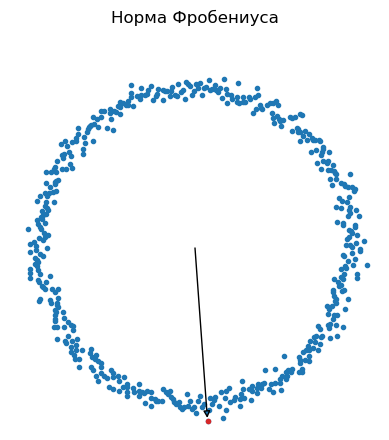

In [73]:
plt.style.use('default')
def frobe(n):
    Ar = sps.uniform.rvs(size=(n, n))
    shum = np.sum(Ar**2, axis=0)
    fnorm = max(shum)
    phi = np.linspace(0, 2*np.pi, n)
    phinorm = np.where(shum == fnorm)
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(phi, shum, '.')
    ax.plot(phi[phinorm], fnorm, '.', '\0',  color ='tab:red')
    plt.axis('off')
    ax.set_title("Норма Фробениуса", va='bottom')
    ax.grid(False)
    ax.set_xlabel('Красная точка - позиция максимальной длины вектора')
    plt.annotate("", xy=(phi[phinorm], fnorm), xytext=(0, 0), 
                 arrowprops={"arrowstyle":"-|>"})
    
    # Радиус этой окружности равен норме Фробениуса
frobe(500)
print(len(shum))

def normfrobe(n):
    Ar = sps.uniform.rvs(size=(n, n))
    shum = np.sum(Ar**2, axis=0)
    fnorm = max(shum)
    return (shum, fnorm)

In [11]:
import matplotlib.animation as animation
import time

In [12]:
#

In [13]:
from celluloid import Camera

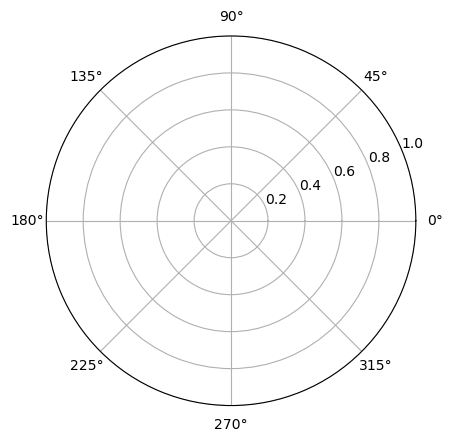

MovieWriter PillowWriter unavailable; using Pillow instead.


In [108]:
n = 35
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

camera = Camera(fig)
for i in range(30):
    #frobe(n)
    plt.pause(0.1)
    
    Ar = sps.uniform.rvs(size=(n, n))
    shum = np.sum(Ar**2, axis=0)
    fnorm = max(shum)
    phi = np.linspace(0, 2*np.pi, n)
    phinorm = np.where(shum == fnorm)
    ax.plot(phi, shum, '.', color = 'tab:blue')
    ax.plot(phi[phinorm], fnorm, 'x',   color ='tab:red')
    ax.plot(0, 0, '.', color = 'k')
    ax.axis('off')
    ax.set_title("Норма Фробениуса", va='bottom')
    ax.grid(False)
    ax.set_xlabel('Красная точка - позиция максимальной длины вектора ', va='bottom')
    ax.annotate("", xy=(phi[phinorm], fnorm), xytext=(0, 0), 
                 arrowprops={"arrowstyle":"-|>"})
    #plt.clf()
    fnorm_array = np.zeros(n)
    for j in range(n):
        fnorm_array[j] = fnorm
    
    #camera.snap()
    #ax.xaxis.set_visible(True)
    ax.plot(phi, fnorm_array, '--', color='tab:red')
    camera.snap()

#as 
animation = camera.animate()
animation.save('normaliner.gif', writer='PillowWriter', fps=2)

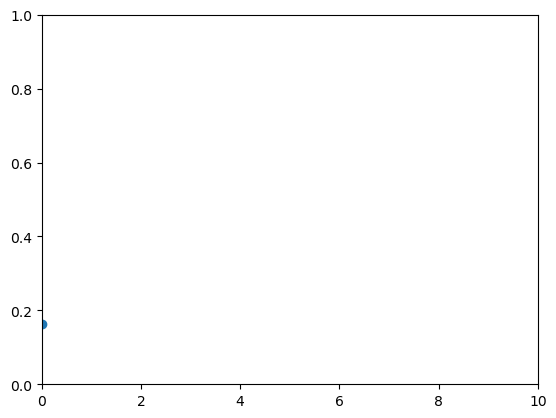

MovieWriter PillowWriter unavailable; using Pillow instead.


In [29]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np


# create figure object
fig = plt.figure()
# load axis box
ax = plt.axes()
# set axis limit
ax.set_ylim(0, 1)
ax.set_xlim(0, 10)

camera = Camera(fig)
for i in range(10):
    ax.scatter(i, np.random.random())
    plt.pause(0.1)
    camera.snap()

animation = camera.animate()
animation.save('animation.gif', writer='PillowWriter', fps=2)

# 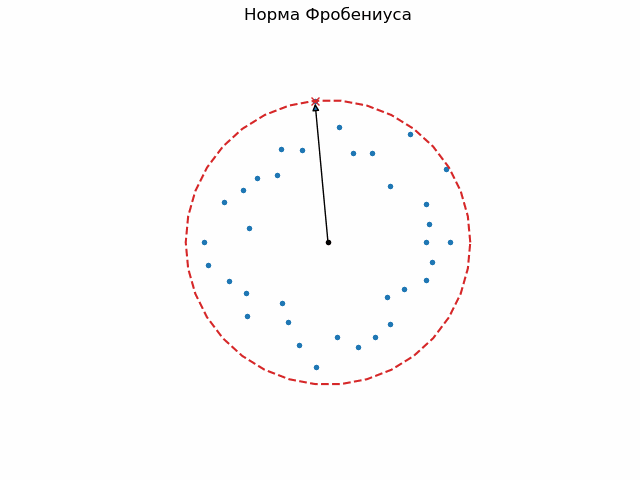